In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
dataset = pd.read_csv("/home/mbc/thesissatria/Dataset/CICIOT2023_MMSPCA.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628497 entries, 0 to 3628496
Data columns (total 24 columns):
 #   Column       Dtype  
---  ------       -----  
 0   PC1          float64
 1   PC2          float64
 2   PC3          float64
 3   PC4          float64
 4   PC5          float64
 5   PC6          float64
 6   PC7          float64
 7   PC8          float64
 8   PC9          float64
 9   PC10         float64
 10  PC11         float64
 11  PC12         float64
 12  PC13         float64
 13  PC14         float64
 14  PC15         float64
 15  PC16         float64
 16  PC17         float64
 17  PC18         float64
 18  PC19         float64
 19  PC20         float64
 20  PC21         float64
 21  PC22         float64
 22  PC23         float64
 23  Attack Type  object 
dtypes: float64(23), object(1)
memory usage: 664.4+ MB


In [5]:
dups = dataset[dataset.duplicated()]
print(f'Jumlah Duplikat: {len(dups)}')

Jumlah Duplikat: 3


In [6]:
print("Ukuran Dataset Sebelum Drop Duplikat:\n")
dataset.shape

Ukuran Dataset Sebelum Drop Duplikat:



(3628497, 24)

In [7]:
print("Ukuran Dataset Sesudah Drop Duplikat:\n")
dataset.drop_duplicates(inplace = True)
dataset.shape

Ukuran Dataset Sesudah Drop Duplikat:



(3628494, 24)

In [8]:
missing_val = dataset.isna().sum()
print(missing_val.loc[missing_val > 0])

numeric_cols = dataset.select_dtypes(include = np.number).columns
inf_count = np.isinf(dataset[numeric_cols]).sum()
print(inf_count[inf_count > 0])

print(f'Nilai Hilang {dataset.isna().sum().sum()}')

Series([], dtype: int64)
Series([], dtype: int64)
Nilai Hilang 0


In [9]:
dataset.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
count,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,...,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06,3.628494e+06
mean,3.690710e-07,5.834153e-08,-8.238653e-07,1.615668e-07,1.659303e-07,1.222341e-07,-5.066799e-08,-6.767447e-08,-3.256579e-08,-2.115469e-08,...,-4.975920e-10,1.024203e-08,-1.109709e-09,-1.204638e-10,5.774051e-10,-4.708006e-10,5.712269e-10,1.280583e-09,-4.331201e-10,-6.978903e-10
std,6.791920e-01,4.532402e-01,3.995650e-01,3.725502e-01,2.956758e-01,2.256159e-01,2.084116e-01,2.047579e-01,1.830670e-01,1.629002e-01,...,5.010837e-02,4.555624e-02,4.184856e-02,2.805372e-02,2.144935e-02,1.856545e-02,1.510711e-02,1.383431e-02,1.255650e-02,1.134528e-02
min,-9.685212e-01,-1.498788e+00,-4.166128e-01,-7.253359e-01,-6.736896e-01,-7.568902e-01,-6.229967e-01,-8.050700e-01,-7.368300e-01,-1.021139e+00,...,-8.800931e-01,-6.870369e-01,-1.058963e+00,-1.650097e-01,-4.713045e-01,-1.678446e+00,-1.203687e+00,-5.590967e-02,-2.564384e-02,-3.676589e-01
25%,-9.173808e-01,-9.567233e-02,-3.272150e-01,-1.954142e-01,-8.582356e-02,-1.071361e-01,-5.264863e-02,-1.292222e-01,-6.286072e-02,-8.840409e-03,...,-5.789411e-03,-8.454532e-03,-7.489468e-03,-1.530099e-03,-7.719010e-04,-1.784156e-04,-2.440145e-03,-1.545592e-03,-3.080251e-04,-7.189626e-04
50%,3.494702e-01,-6.621499e-03,-7.316850e-02,-3.201886e-02,-5.103221e-02,-7.094930e-02,1.582933e-02,1.558992e-02,-1.223277e-02,-2.223570e-03,...,-1.911807e-03,-4.917366e-03,2.378451e-03,-7.171285e-04,9.033489e-04,7.194355e-05,-6.908424e-04,-8.749164e-04,1.008472e-04,1.483179e-04
75%,6.137734e-01,1.084587e-01,4.851526e-02,3.983250e-02,4.151587e-02,4.204513e-02,6.127733e-02,8.185162e-02,1.775824e-02,1.208882e-02,...,5.067922e-04,8.242954e-03,6.151287e-03,1.114512e-03,5.959038e-03,2.422994e-04,2.867997e-04,-5.864392e-04,3.218035e-04,3.988404e-04
max,9.751694e-01,6.340439e-01,1.039128e+00,1.398103e+00,1.450489e+00,9.704838e-01,1.046801e+00,8.766610e-01,7.794824e-01,8.475416e-01,...,7.130878e-01,4.245966e-01,7.793388e-01,9.174564e-01,7.324025e-01,2.939482e-02,6.104942e-01,1.412871e+00,1.001285e+00,4.884579e-01


In [10]:
print("Jumlah Serangan Pada Dataset: \n")
dataset['Attack Type'].value_counts()

Jumlah Serangan Pada Dataset: 



Attack Type
DDoS              2450876
DoS                737933
Mirai              242315
BENIGN             109198
Network Attack      53730
Recon               31732
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64

In [11]:
label_map = {
    'BENIGN': 0,
    'DDoS': 1,
    'DoS': 2,
    'Mirai': 3,
    'Network Attack': 4,
    'Recon': 5,
    'Brute Force': 6,
    'Injection': 7,
    'Malware': 8,
}
dataset['Attack Type'] = dataset['Attack Type'].map(label_map)

In [12]:
dataset['Attack Type'].value_counts()

Attack Type
1    2450876
2     737933
3     242315
0     109198
4      53730
5      31732
6       1288
7       1114
8        308
Name: count, dtype: int64

In [13]:
X = dataset.drop('Attack Type',axis=1)
X = X.astype('float64')
y = dataset['Attack Type']

In [14]:
X.isnull().sum()

PC1     0
PC2     0
PC3     0
PC4     0
PC5     0
PC6     0
PC7     0
PC8     0
PC9     0
PC10    0
PC11    0
PC12    0
PC13    0
PC14    0
PC15    0
PC16    0
PC17    0
PC18    0
PC19    0
PC20    0
PC21    0
PC22    0
PC23    0
dtype: int64

In [15]:
y.isnull().sum()

0

In [16]:
# Bagi dataset menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [17]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)

print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (2902795, 23)
y_train: (2902795,)
X_test: (725699, 23)
y_test: (725699,)


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
print("X_train:",X_train.shape)

print("X_test:",X_test.shape)


X_train: (2902795, 23)
X_test: (725699, 23)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

2025-03-06 21:11:42.399326: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 21:11:42.426116: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 21:11:42.426637: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-06 21:11:43.056089: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [21]:
# Mengubah label menjadi format kategori
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Membuat model Deep Neural Network
model = Sequential()

# Menambahkan layer input dan hidden layers
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Menambahkan layer output
model.add(Dense(units=9, activation='softmax'))  # 8 kelas

# Menyusun model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=64, validation_data=(X_test, y_test_cat))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Prediksi menggunakan model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


2025-03-06 21:11:43.805771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-06 21:11:43.806198: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
45357/45357 [==============================] - 56s 1ms/step - loss: 0.3346 - accuracy: 0.8392 - val_loss: 0.2743 - val_accuracy: 0.8941
Epoch 2/20
45357/45357 [==============================] - 54s 1ms/step - loss: 0.1720 - accuracy: 0.9292 - val_loss: 0.0999 - val_accuracy: 0.9632
Epoch 3/20
45357/45357 [==============================] - 55s 1ms/step - loss: 0.1173 - accuracy: 0.9552 - val_loss: 0.0808 - val_accuracy: 0.9685
Epoch 4/20
45357/45357 [==============================] - 54s 1ms/step - loss: 0.1147 - accuracy: 0.9574 - val_loss: 0.2055 - val_accuracy: 0.9194
Epoch 5/20
45357/45357 [==============================] - 54s 1ms/step - loss: 0.0955 - accuracy: 0.9646 - val_loss: 0.0719 - val_accuracy: 0.9755
Epoch 6/20
45357/45357 [==============================] - 55s 1ms/step - loss: 0.0873 - accuracy: 0.9682 - val_loss: 0.0664 - val_accuracy: 0.9762
Epoch 7/20
45357/45357 [==============================] - 52s 1ms/step - loss: 0.0834 - accuracy: 0.9695 - val_loss: 0

/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      0.96      0.84     22012
           1       0.99      0.99      0.99    490057
           2       0.97      0.99      0.98    147750
           3       1.00      0.99      1.00     48311
           4       0.82      0.59      0.69     10734
           5       0.83      0.47      0.60      6259
           6       1.00      0.15      0.26       282
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        64

    accuracy                           0.98    725699
   macro avg       0.71      0.57      0.60    725699
weighted avg       0.98      0.98      0.98    725699



/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


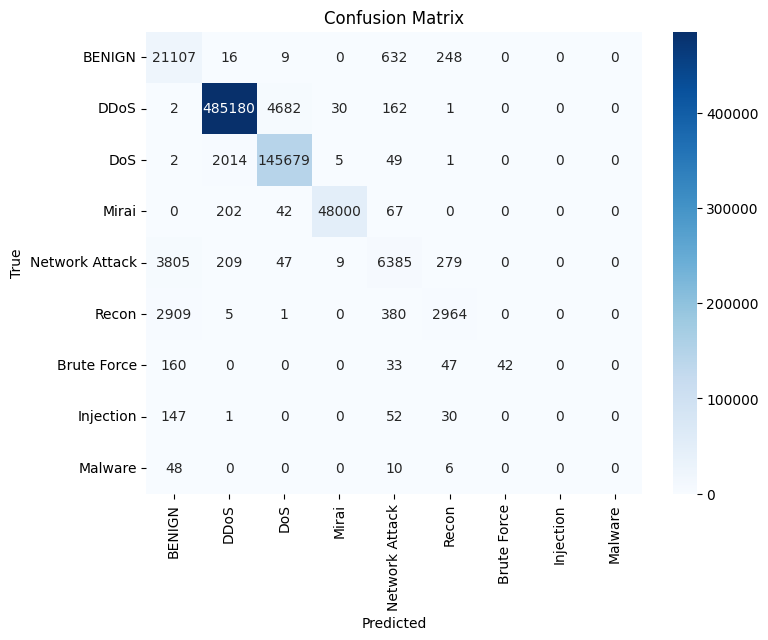

In [22]:
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Membuat plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


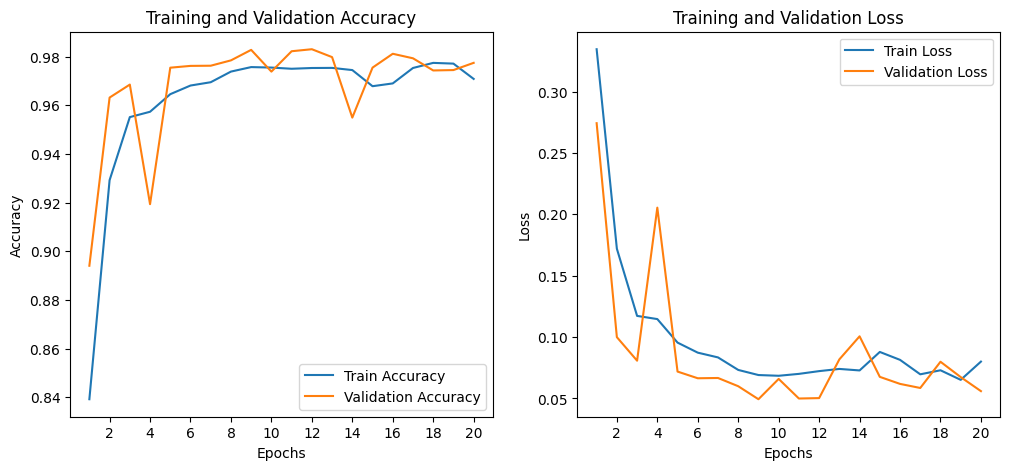

In [23]:
import matplotlib.pyplot as plt

# Ambil jumlah total epoch dari history
total_epochs = len(history.history['accuracy'])

# Pastikan jumlah epoch mencapai 20
epochs_range = range(1, total_epochs + 1)

# Plot Akurasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(range(2, total_epochs + 1, 2))  # Menampilkan setiap 2 epoch mulai dari 2
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Train Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xticks(range(2, total_epochs + 1, 2))  # Menampilkan setiap 2 epoch mulai dari 2
plt.legend()

plt.show()